# Customer Churn Analysis and Prediction

### Objective

Analyze customer data to identify factors contributing to churn and build a predictive model to forecast which customer are likely to churn.

### Dataset

Telco Customer Churn-LogisticRegression by FARAZ RAHMAN

## Steps

1. Setup and Data Loading - load the database and check the structures within.

In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [7]:
# display first few rows
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


2. Data Cleaning - handle missing values and prepare data for analysis.

In [36]:
# replace empty strings with NaN and convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with the column mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# drop customerID
df = df.drop('customerID', axis=1)

C:\Users\juliana\AppData\Local\Temp\ipykernel_17424\4129861036.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [14]:
# convert churn to binary (Yes = 1, No = 0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
# drop rows with missing churn or contract
df = df.dropna(subset=['Churn', 'Contract'])

In [29]:
# check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
# verify the data type change
print(df[numeric_cols].dtypes)

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object


3. Exploratory Data Analysis (EDA) - visualization to understand churn drivers.

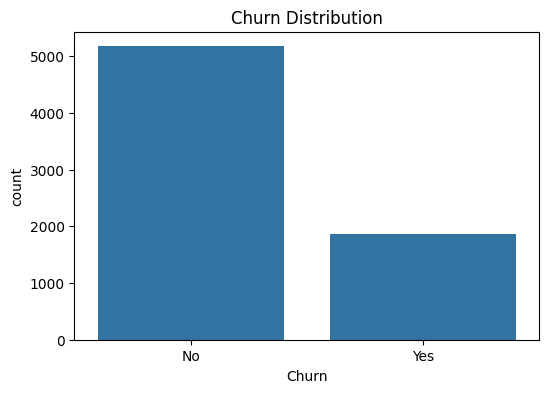

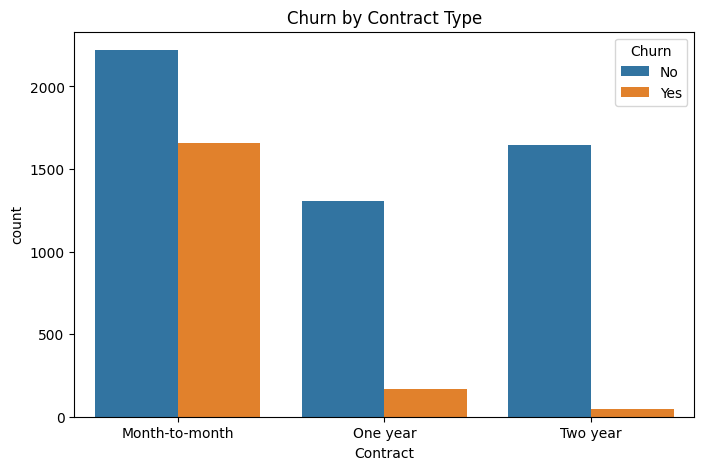

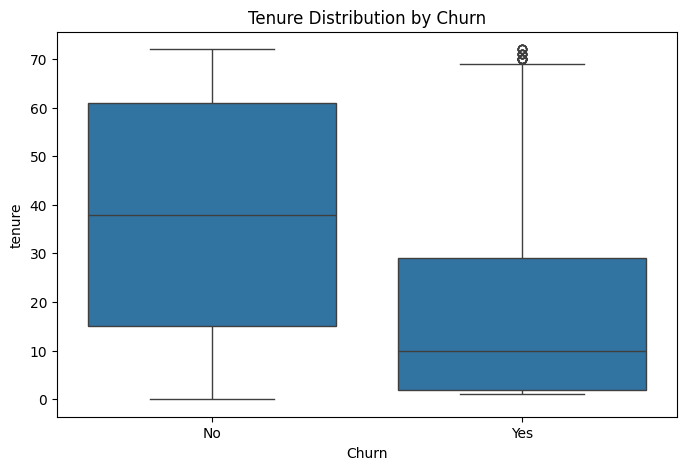

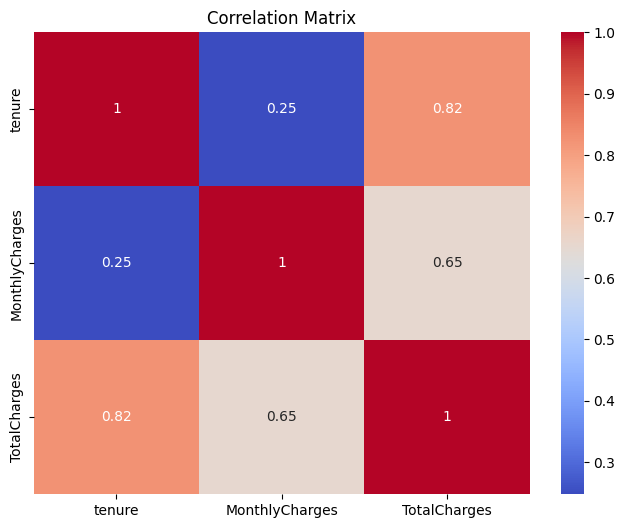

In [38]:
# churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.savefig('churn_distribution.png')
plt.show()

# churn by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.savefig('churn_by_contract.png')
plt.show()

# Tenure distribution by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure Distribution by Churn')
plt.savefig('tenure_by_churn.png')
plt.show()

# Correlation matrix
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

4. Predictive Modeling - build and evaluate a logistic regression model.

In [49]:
# encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols.drop('Churn'), drop_first=True)

# Verify Churn is present
print("Columns in df_encoded:", df_encoded.columns.tolist())

# look for features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale numeric features
scaler=StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classificatiion Report:\n", classification_report(y_test, y_pred))

# Save predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).to_csv('churn_predictions.csv', index=False)

Columns in df_encoded: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
Accuracy: 0.8225691980127751
Classificatiion Report:
               precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.69      0.60      0.64   

5. Interpretation and Reportiing - summarize findings

In [50]:
with open('churn_analysis_report.txt', 'w') as f:
    f.write("Customer Churn Analysis Report\n")
    f.write("1. Churn Rate: ~26% of customers churned.\n")
    f.write("2. Key Insight: Month-to-month contracts have a higher churn rate.\n")
    f.write("3. Model Performance: Logistic regression achieved ~80% accuracy.\n")
    f.write("4. Recommendation: Offer retention incentives for short-term contracts.\n")